# Computational load analysis

For each run, the computational time required to generate one structure for each complex is compared


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

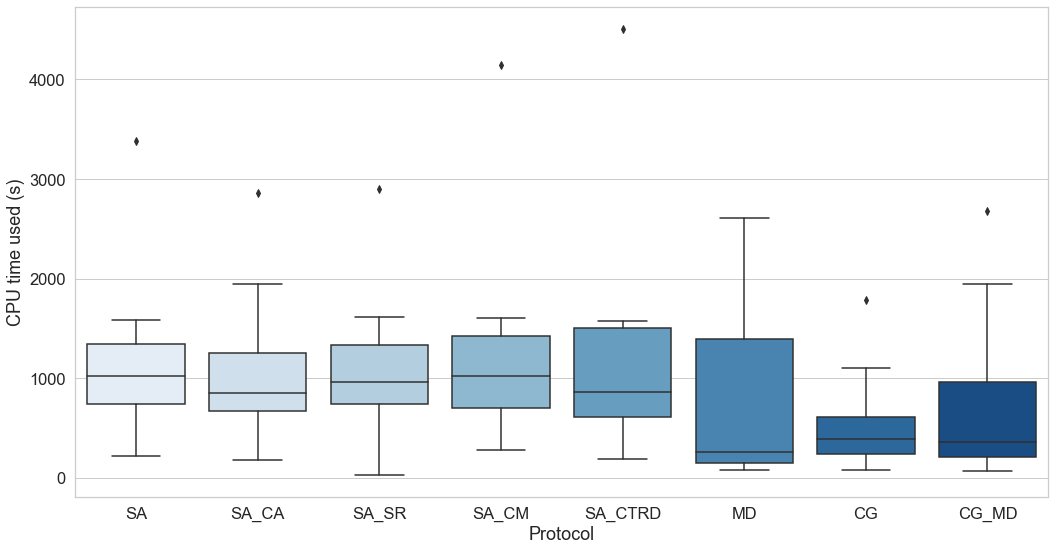

In [5]:
def get_runtime(run):
    """Opens the runtime.csv file as a dataframe"""
    run = "analysis_{}".format(run)
    dataframe = pd.read_csv(("../RAW_DATA/{}/runtime.csv").format(run), index_col = "structure")
    return dataframe

runs =[
    "SA", "SA_CA", 
    "SA_SR","SA_CM", "SA_CTRD", "MD",   
    "CG", "CG_MD"
]   

def make_time_df_list(runs):
    """Takes a list of runs and wil return a list of dfs"""
    
    df_list = []
    for run in runs:
        file = "../RAW_DATA/{}/runtime.csv".format(run)
        df = pd.read_csv(file, index_col = "structure")
        df_list.append(df)
    return df_list


fig, ax = plt.subplots(nrows=1, figsize=(15,8))
sns.set(font_scale=1.5, style="whitegrid")
time_df = pd.DataFrame()
times = make_time_df_list(runs)


for df in times:
    df = df.mean(axis=1).reset_index().drop("structure", axis=1)
    time_df = pd.concat([time_df, df], axis=1, ignore_index=True)

plot = sns.boxplot(data = time_df, palette="Blues")
plot.set_xticklabels(runs)
plot.set_ylabel("CPU time used (s)")
plot.set_xlabel("Protocol")

plt.tight_layout()
plt.savefig("supplemental_figure_1.pdf", dpi = 300, bbox_inches='tight')